In [1]:
import pandas as pd

#Carregando os dados

In [2]:
df = pd.read_csv('/Users/felipe.miziara/Documents/IPT/IOT/turbidez_sabesp3.csv', sep=';')

In [3]:
df.shape

(21051, 7)

In [4]:
df.columns

Index(['Timestamp', 'Voltage', 'Sensor', 'Valor', 'Consumo Humano',
       'Consumo Animal', 'Consumo Plantas'],
      dtype='object')

In [5]:
df.dtypes

Timestamp           object
Voltage            float64
Sensor              object
Valor              float64
Consumo Humano      object
Consumo Animal      object
Consumo Plantas     object
dtype: object

In [6]:
df.describe()

,Voltage,Valor
count,21051.000000,19754.000000
mean,3.384717,5.521011
std,0.672497,55.313127
min,-0.000875,0.000000
25%,3.122563,0.482187
50%,3.265625,1.787090
75%,3.736000,2.154947
max,5.000000,1000.000000


In [7]:
df['Voltage'].describe()

count    21051.000000
mean         3.384717
std          0.672497
min         -0.000875
25%          3.122563
50%          3.265625
75%          3.736000
max          5.000000
Name: Voltage, dtype: float64

<Axes: >

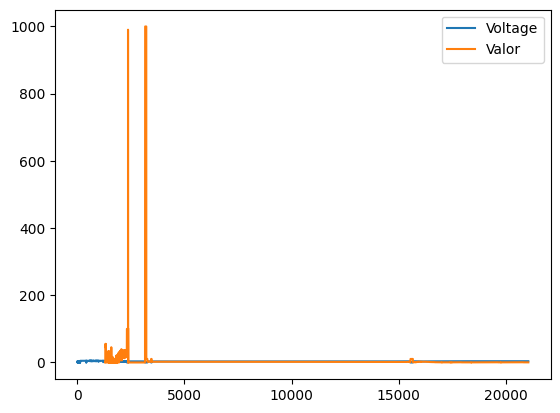

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

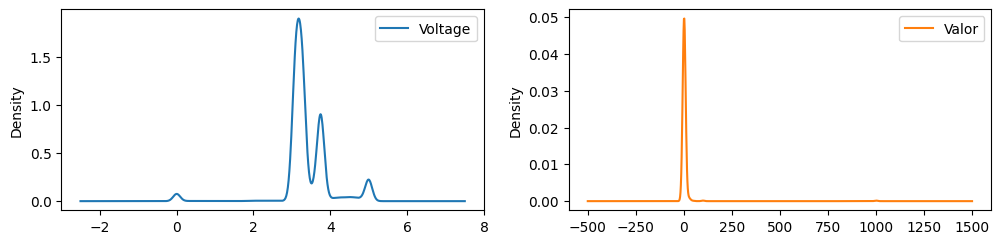

In [9]:
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()


<Axes: ylabel='Density'>

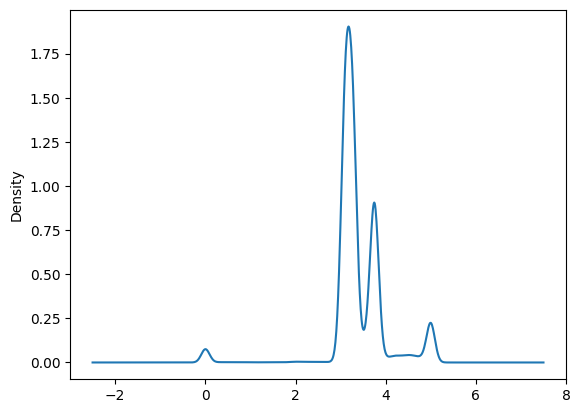

In [10]:
df['Voltage'].plot.density()

<Axes: ylabel='Density'>

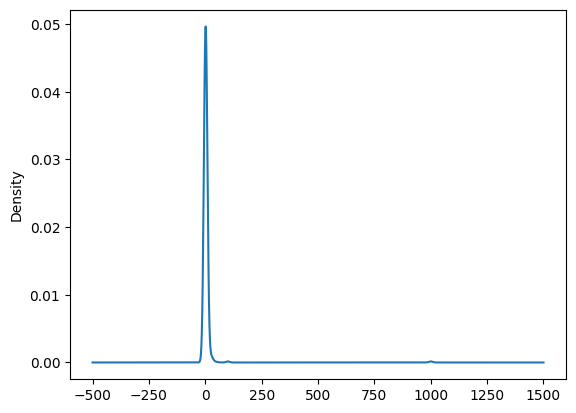

In [11]:
df['Valor'].plot.density()

<Axes: ylabel='Frequency'>

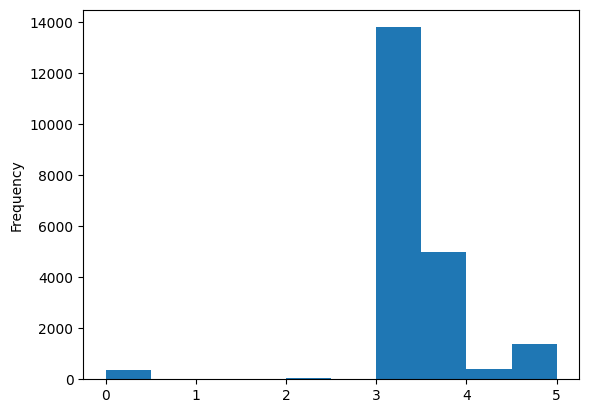

In [12]:
df['Voltage'].plot.hist()

<Axes: ylabel='Frequency'>

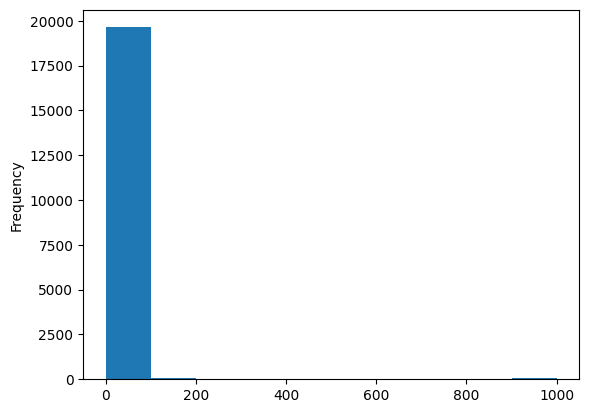

In [13]:
df['Valor'].plot.hist()

<Axes: >

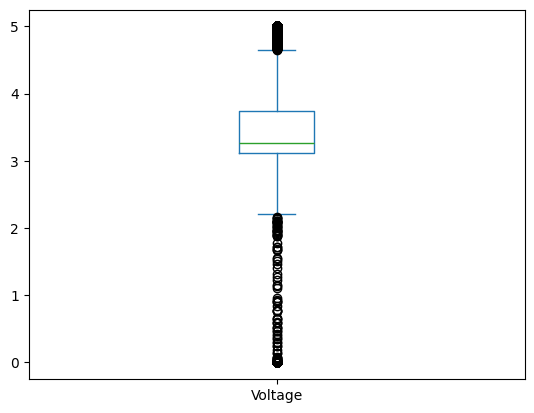

In [14]:
df['Voltage'].plot.box()

<Axes: >

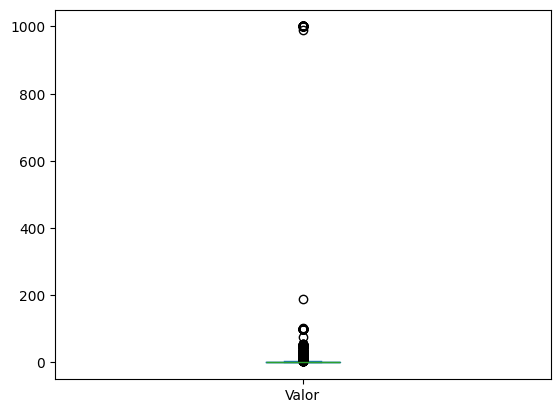

In [15]:
df['Valor'].plot.box()

In [16]:
df['Timestamp'] =  pd.to_datetime(df['Timestamp'])


In [17]:
df.dtypes

Timestamp          datetime64[ns]
Voltage                   float64
Sensor                     object
Valor                     float64
Consumo Humano             object
Consumo Animal             object
Consumo Plantas            object
dtype: object

In [18]:
print(df)

                Timestamp   Voltage           Sensor     Valor Consumo Humano  \
0     2024-07-14 14:27:18  0.518926              NaN       NaN            NaN   
1     2024-07-14 14:27:23  0.000000              NaN       NaN            NaN   
2     2024-07-14 14:27:28  0.000000              NaN       NaN            NaN   
3     2024-07-14 14:27:33  0.000000              NaN       NaN            NaN   
4     2024-07-14 14:27:38  0.000000              NaN       NaN            NaN   
...                   ...       ...              ...       ...            ...   
21046 2024-08-12 19:23:30  3.767625  Water Turbidity  0.365088          clean   
21047 2024-08-12 19:23:34  3.767375  Water Turbidity  0.365761          clean   
21048 2024-08-12 19:23:39  3.766875  Water Turbidity  0.367106          clean   
21049 2024-08-12 19:23:44  3.766625  Water Turbidity  0.367778          clean   
21050 2024-08-12 19:23:48  3.766125  Water Turbidity  0.369123          clean   

      Consumo Animal Consum

In [19]:
print(df)

                Timestamp   Voltage           Sensor     Valor Consumo Humano  \
0     2024-07-14 14:27:18  0.518926              NaN       NaN            NaN   
1     2024-07-14 14:27:23  0.000000              NaN       NaN            NaN   
2     2024-07-14 14:27:28  0.000000              NaN       NaN            NaN   
3     2024-07-14 14:27:33  0.000000              NaN       NaN            NaN   
4     2024-07-14 14:27:38  0.000000              NaN       NaN            NaN   
...                   ...       ...              ...       ...            ...   
21046 2024-08-12 19:23:30  3.767625  Water Turbidity  0.365088          clean   
21047 2024-08-12 19:23:34  3.767375  Water Turbidity  0.365761          clean   
21048 2024-08-12 19:23:39  3.766875  Water Turbidity  0.367106          clean   
21049 2024-08-12 19:23:44  3.766625  Water Turbidity  0.367778          clean   
21050 2024-08-12 19:23:48  3.766125  Water Turbidity  0.369123          clean   

      Consumo Animal Consum

# Limpando registros com hora nula

In [20]:
if df['Timestamp'].isnull().any():
    df.dropna(subset=['Timestamp'], inplace=True) 

In [21]:
df['Grupos'] = df['Timestamp'].dt.floor('6min')
df.head()

,Timestamp,Voltage,Sensor,Valor,Consumo Humano,Consumo Animal,Consumo Plantas,Grupos
0,2024-07-14 14:27:18,0.518926,NaN,NaN,NaN,NaN,NaN,2024-07-14 14:24:00
1,2024-07-14 14:27:23,0.000000,NaN,NaN,NaN,NaN,NaN,2024-07-14 14:24:00
2,2024-07-14 14:27:28,0.000000,NaN,NaN,NaN,NaN,NaN,2024-07-14 14:24:00
3,2024-07-14 14:27:33,0.000000,NaN,NaN,NaN,NaN,NaN,2024-07-14 14:24:00
4,2024-07-14 14:27:38,0.000000,NaN,NaN,NaN,NaN,NaN,2024-07-14 14:24:00


In [22]:
df_agrupado = df.groupby('Grupos')

max_min_values = df_agrupado['Voltage'].agg(['max', 'min'])

print(max_min_values)

                          max       min
Grupos                                 
2024-07-14 14:24:00  3.910867  0.000000
2024-07-14 14:30:00  4.324786  0.000000
2024-07-14 14:36:00  5.000000  0.000000
2024-07-14 14:42:00  5.000000  4.687424
2024-07-14 14:48:00  5.000000  5.000000
...                       ...       ...
2024-08-11 22:24:00  3.755875  3.755125
2024-08-11 23:24:00  3.757375  3.666000
2024-08-11 23:30:00  3.756000  3.755375
2024-08-12 09:24:00  3.798500  3.716125
2024-08-12 19:18:00  3.779875  3.694750

[432 rows x 2 columns]


In [23]:
def remove_outliers_iqr(group):
    Q1 = group['Voltage'].quantile(0.15)
    Q3 = group['Voltage'].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[((group['Voltage'] >= lower_bound) & (group['Voltage'] <= upper_bound))]

# Aplique a função aos seus dados agrupados
filtered_data = df_agrupado.apply(remove_outliers_iqr, include_groups=False)

# Visualize os resultados
filtered_data.head()

#print(filtered_data)

Timestamp   Voltage Sensor  Valor  \
Grupos                                                              
2024-07-14 14:24:00 0 2024-07-14 14:27:18  0.518926    NaN    NaN   
                    1 2024-07-14 14:27:23  0.000000    NaN    NaN   
                    2 2024-07-14 14:27:28  0.000000    NaN    NaN   
                    3 2024-07-14 14:27:33  0.000000    NaN    NaN   
                    4 2024-07-14 14:27:38  0.000000    NaN    NaN   

                      Consumo Humano Consumo Animal Consumo Plantas  
Grupos                                                               
2024-07-14 14:24:00 0            NaN            NaN             NaN  
                    1            NaN            NaN             NaN  
                    2            NaN            NaN             NaN  
                    3            NaN            NaN             NaN  
                    4            NaN            NaN             NaN

In [24]:
df_agrupado2 = filtered_data.groupby('Grupos')

max_min_values = df_agrupado2['Voltage'].agg(['max', 'min'])

print(max_min_values)

                          max       min
Grupos                                 
2024-07-14 14:24:00  3.910867  0.000000
2024-07-14 14:30:00  4.324786  0.000000
2024-07-14 14:36:00  5.000000  0.000000
2024-07-14 14:42:00  5.000000  5.000000
2024-07-14 14:48:00  5.000000  5.000000
...                       ...       ...
2024-08-11 22:24:00  3.755875  3.755125
2024-08-11 23:24:00  3.757375  3.755875
2024-08-11 23:30:00  3.756000  3.755375
2024-08-12 09:24:00  3.798500  3.784875
2024-08-12 19:18:00  3.779875  3.766125

[432 rows x 2 columns]


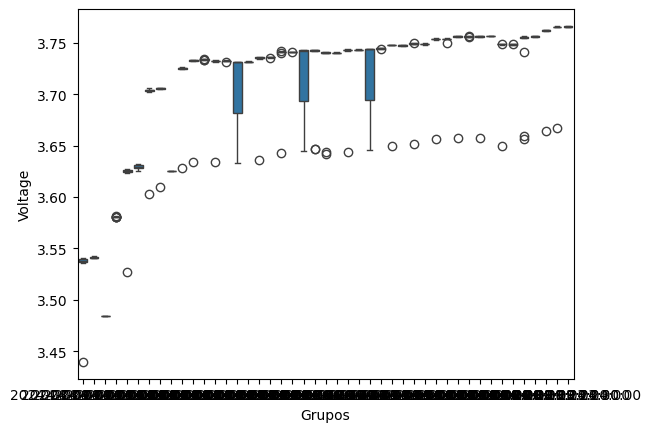

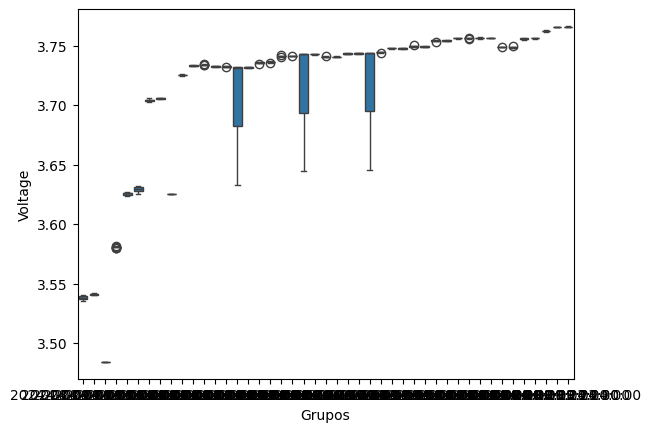

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você queira os dados do dia '2023-08-11'
data_especifica = '2024-08-09'
dados_do_dia = df[df['Timestamp'].dt.date == pd.to_datetime(data_especifica).date()]

filtrados = filtered_data[filtered_data['Timestamp'].dt.date == pd.to_datetime(data_especifica).date()]

# Supondo que você já tenha o DataFrame 'df' com os dados originais
# e o DataFrame 'filtered_data' com os dados após a tentativa de remoção de outliers

# Visualizar a distribuição da coluna 'voltage' antes e depois da filtragem
sns.boxplot(x='Grupos', y='Voltage', data=dados_do_dia)  # Antes da filtragem
plt.show()

sns.boxplot(x='Grupos', y='Voltage', data=filtrados)  # Depois da filtragem
plt.show()

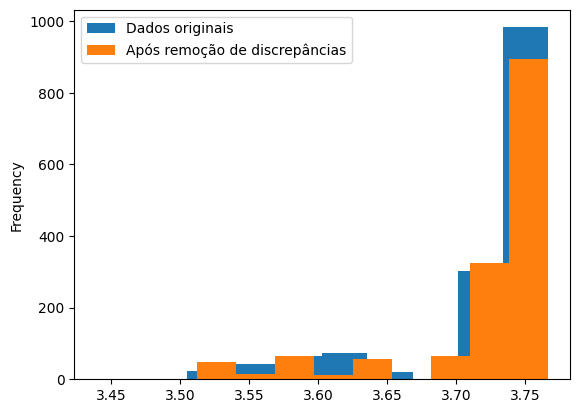

In [34]:
dados_do_dia['Voltage'].plot.hist(label='Dados originais')
filtrados['Voltage'].plot.hist(label='Após remoção de discrepâncias')

plt.legend()

<Axes: ylabel='Frequency'>

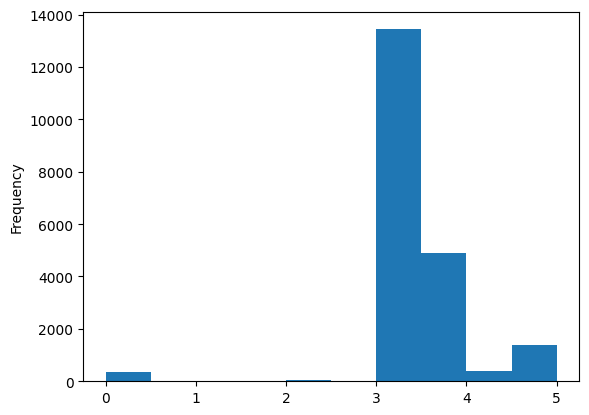

In [27]:
filtered_data['Voltage'].plot.hist()

<Axes: >

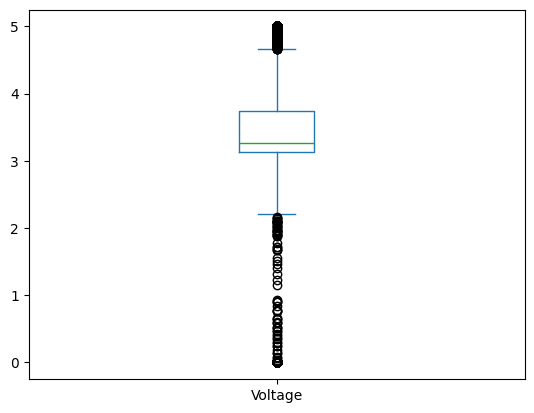

In [28]:
filtered_data['Voltage'].plot.box()

<Axes: >

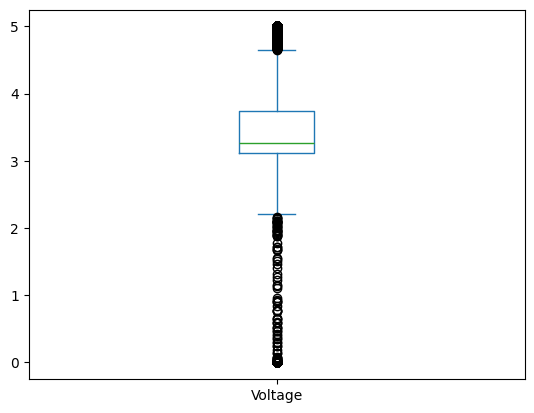

In [29]:
df['Voltage'].plot.box()

In [30]:
avgVolts = filtered_data.groupby('Grupos')['Voltage'].agg(['mean', 'std', 'min', 'max'])

avgVolts.head()

avgVolts.dtypes
#df = pd.DataFrame(avgVolts, index=filtered_data.index)


#filtered_data = filtered_data.cumsum()
#plt.figure();
#filtered_data.plot()

mean    float64
std     float64
min     float64
max     float64
dtype: object

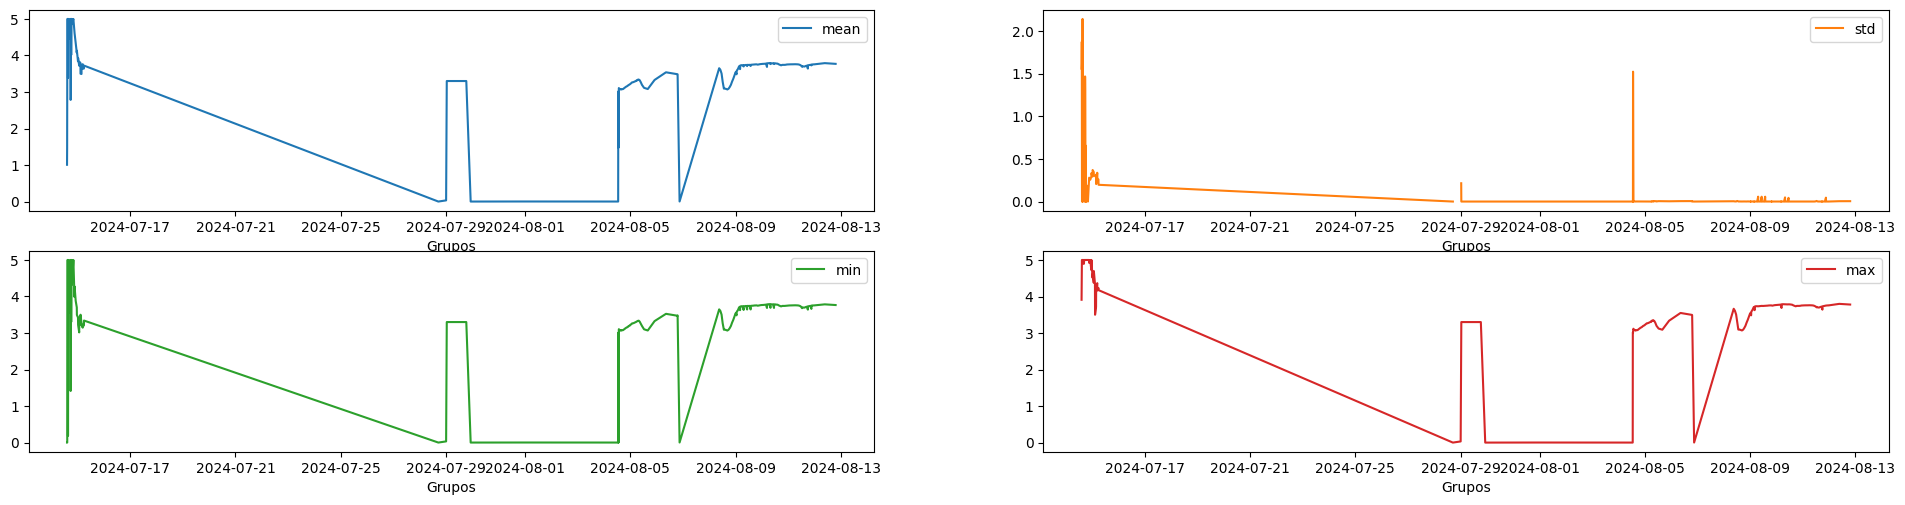

In [31]:
avgVolts.plot(kind='line',subplots=True,layout=(4,2),figsize=(24,12),sharex=False)
plt.show()

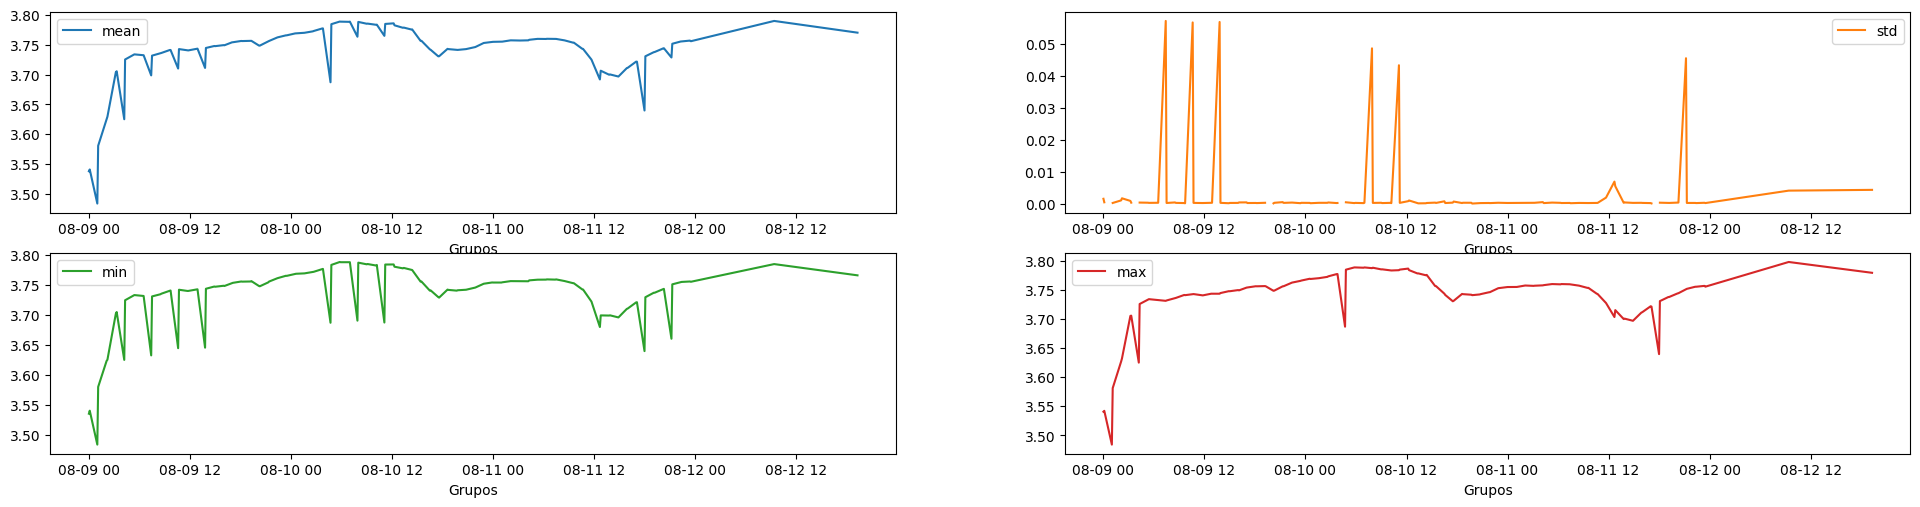

In [32]:
data_especifica = '2024-08-09'
#avgVolts['Timestamp'] =  pd.to_datetime(avgVolts['Grupos'])


dadosVerdade = avgVolts[avgVolts.index.date >= pd.to_datetime(data_especifica).date()]

dadosVerdade.plot(kind='line',subplots=True,layout=(4,2),figsize=(24,12),sharex=False)
plt.show()